## CS-E4820 Machine Learning: Advanced Probabilistic Methods (Spring 2023)

Pekka Marttinen, Vishnu Raj, Antti Pöllänen, Nikitin Alexander, Sebastiaan De Peuter, Tommi Gröhn, Julien Martinelli, Ali Khoshvishkaie, Onur Poyraz


## Exercise 4, due on Tuesday February 28th at 23:50.


### Contents
1. Problem 1: ML-II for linear model
2. Problem 2: Optimizing hyperparameters with validation set
3. Problem 3: Poisson regression with Laplace approximation


# Problem 1: ML-II for a linear model

Fit the Bayesian linear parameter model to a given data 'ex4_1_data.txt' using the ML II approach. Optimize the hyperparameters $\alpha$ and $\beta$ using grid search. Complete the template given below with your own code. Make predictions for the test data using the fitted model and compute the mean squared error for test data. Also plot the data and the fitted model.

In [3]:
# Starter code for problems 1 and 2. 
# NOTE: variables defined in this cell are used in code templates for problem 1 and 2.
import numpy as np
import matplotlib.pyplot as plt

# INITIALIZATION
# Load the observations
data = np.loadtxt('/coursedata/ex4_1_data.txt')
x_obs = data[:,0]
y_obs = data[:,1]

print("x_obs and y_obs shape")
print(x_obs.shape)
print(y_obs.shape)

# Training data
N_train = 40
x_train = x_obs[:N_train]
y_train = y_obs[:N_train]

print("x_train and y_train shape")
print(x_train.shape)
print(y_train.shape)

# Validation data
N_valid = 10
x_valid = x_obs[N_train:N_train+N_valid]
y_valid = y_obs[N_train:N_train+N_valid]

print("x_valid and y_valid shape")
print(x_valid.shape)
print(y_valid.shape)

# Testing data
N_test = 10
x_test = x_obs[N_train+N_valid:]
y_test = y_obs[N_train+N_valid:]

print("x_test and y_test shape")
print(x_test.shape)
print(y_test.shape)

x_range = (-5, 5) # Possible values of x are in this range

# Basis function parameters
num_basis_functions = 11
centers = np.linspace(x_range[0], x_range[1], num_basis_functions)
lambdaval = 0.17
# You can use here assume the correct basis function centers and lambda ...
def rbf(x, centers, lambdaval):
    # Radial Basis Function output for input x
    #
    # Inputs:
    # x : input points (one-dimensional array)
    # centers : basis function centers (one-dimensional array)
    # lambdaval : basis function width (scalar). It is a hyperparameter that needs tuning
    #
    # Output:
    # Radial Basis Functions evaluated at x (two-dimensional array with len(x)
    #                                        rows and len(centers) columns)
    # np.newaxis is a way to increase the dimensionality of an array by adding an additional axis. 
    
    # In a 1D NumPy array, there is only one axis, so adding a new axis using np.newaxis effectively 
    # converts the 1D array into a 2D row or column vector.
    d = x[:,np.newaxis] - centers[np.newaxis,:]
    y = np.exp(-0.5 * (d ** 2) / lambdaval)
    return y

x_obs and y_obs shape
(60,)
(60,)
x_train and y_train shape
(40,)
(40,)
x_valid and y_valid shape
(10,)
(10,)
x_test and y_test shape
(10,)
(10,)


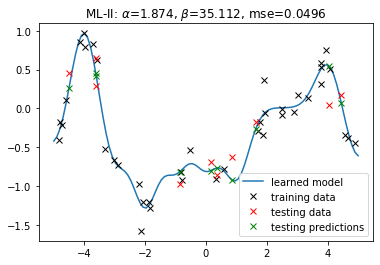

In [7]:
# Template for problem 1
def bayesian_linear_regression(phi_x, y, alpha, beta):
    # Bayesian linear parameter model
    #
    # Inputs:
    # phi_x : the basis function applied to x-data (two-dimensional array)
    # y : y-data (one-dimensional array)
    # alpha : the precision of the weight prior distribution (scalar)
    # beta : the precision of the assumed gaussian noise (scalar)
    #
    # Output:
    # the posterior mean, the posterior covariance, the log marginal likelihood

    N, B = phi_x.shape
    
    
    # Add here code to compute:
    # m = ? # EXERCISE: the posterior mean of w
    # S = ? # EXERCISE: the posterior covariance of w
    # S_inv = ? # EXERCISE: the inverse of S
    

    # YOUR CODE HERE
    # raise NotImplementedError()
    
    # The formulas are inside the barbers Book, page 334, formula 18.1.10
    
    S = np.linalg.inv(alpha * np.eye(B) + beta * phi_x.T @ phi_x)
    S_inv = np.linalg.inv(S)
    m = beta * S @ (y @ phi_x)
    
    # Note: This is a corrected version of equation 18.1.19 from Barbers book
    d = beta * np.dot(phi_x.T, y)
    log_likelihood = 0.5 * (-beta * np.dot(y, y) + d @ S @ d + np.log(np.linalg.det(2 * np.pi * S)) +
                            B * np.log(alpha) + N * np.log(beta) - N * np.log(2 * np.pi))
    # m is a vector, shape (,B)
    # S is a matrix, shape (B, B)
    # log_likelihood is a scalar
    return m, S, log_likelihood

# Specify possible values for the alpha and beta parameters to test
alphas = np.logspace(-3, 3, 100)
betas = np.logspace(-3, 3, 100)

# Grid search over possible values of alpha and beta
best_log_likelihood = -np.inf # optimal parameter values maximize the log likelihood 
for alpha in alphas:
    for beta in betas:
        # Use here functions rbf and bayesian_linear_regression to compute the
        # log marginal likelihood for given alpha and beta
       
        # What are the optimal values of alpha and beta, that maximize the marginal likelihood?
        
        # best_alpha = ? # EXERCISE
        # best_beta = ? # EXERCISE
        
        phi_x_train = rbf(x_train, centers, lambdaval)
        m, S, log_likelihood = bayesian_linear_regression(phi_x_train, y_train, alpha, beta)
        if (log_likelihood > best_log_likelihood):
            best_log_likelihood = log_likelihood
            best_alpha = alpha
            best_beta = beta
        
            # Fit the model one more time using the optimal alpha and beta and the training data 
            # to get m for the optimal model

            # best_m = ? # EXERCISE
            best_m = m

        # YOUR CODE HERE
        # raise NotImplementedError()

# Compute the final regression function
x_coord = np.linspace(x_range[0], x_range[1], 100)

# Compute the predicted values for inputs in x_coord using best_m
# y_mean = ? # EXERCISE

phi_x_coord = rbf(x_coord, centers, lambdaval) 
y_mean = phi_x_coord @ best_m

# YOUR CODE HERE
# raise NotImplementedError()

# Plot the final learned regression function, together with the samples
plt.plot(x_coord, y_mean, label="learned model")
plt.plot(x_train, y_train, 'kx', label="training data")
plt.plot(x_test, y_test, 'rx', label="testing data")

# Make predictions for inputs in the test data, so that you get
# predictions 'y_pred' for inputs in x_test.
# y_pred = ? #EXERCISE

phi_x_test = rbf(x_test, centers, lambdaval) 
y_pred = phi_x_test @ best_m

# YOUR CODE HERE
# raise NotImplementedError()

# print(y_pred)

# Plot the predictions
plt.plot(x_test, y_pred, 'gx', label="testing predictions")

# Compute the mean squared prediction error for the test data.
# mse_test = ???

mse_test = np.mean((y_pred - y_test) ** 2)

# YOUR CODE HERE
# raise NotImplementedError()

plt.legend()
plt.title("ML-II: $\\alpha$=%.3f, $\\beta$=%.3f, mse=%.4f" %
          (best_alpha, best_beta, mse_test))
plt.show()

# Problem 2: Optimizing hyperparameters with validation set

As in problem 1, fit the Bayesian linear parameter model to a given data 'ex4_1_data.txt', but optimize the hyperparameters $\alpha$ and $\beta$ by dividing the training data into training and validation sets, and selecting the values of $\alpha$  and $\beta$ that minimize the mean squared error for the validation set. Make predictions for the test data using the fitted model and compute the mean squared error for test data. Plot the data and the fitted model.

6277


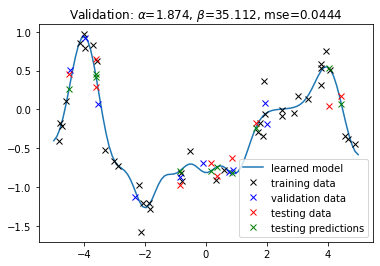

In [12]:
# Template for problem 2
# Specify possible values for the alpha and beta parameters to test
alphas = np.logspace(-3, 3, 100)
betas = np.logspace(-3, 3, 100)

# Grid search over possible values of alpha and beta
mse_valid = np.zeros((len(alphas), len(betas)))
for a, alpha in enumerate(alphas):
    for b, beta in enumerate(betas):
        
        # Use here functions rbf and bayesian_linear_regression to fit the
        # model and compute the prediction error (using mean squared error)
        # for the validation data

        # YOUR CODE HERE
        # raise NotImplementedError()

        phi_x_train = rbf(x_train, centers, lambdaval)
        phi_x_valid = rbf(x_valid, centers, lambdaval)
        m, S, log_likelihood = bayesian_linear_regression(phi_x_train, y_train, alpha, beta)
        y_valid_pred = phi_x_valid @ m
        mse_valid[a,b] = np.mean((y_valid_pred - y_valid) ** 2)
        
        # What are the optimal values of alpha and beta, that minimize the prediction error in the validation data?
        # best_alpha = ? #EXERCISE
        # best_beta = ?  #EXERCISE

        # YOUR CODE HERE
        # raise NotImplementedError()

# Fit the model one more time using the optimal alpha and beta and all data 
# available for model fitting (both training and validation sets)
# best_m = ? #EXERCISE

# YOUR CODE HERE
# raise NotImplementedError()

min_index = np.argmin(mse_valid)
rowOfBest_m, colOfBest_m = np.unravel_index(min_index, mse_valid.shape)
alpha = alphas[rowOfBest_m]
beta = betas[colOfBest_m]
best_m, S, log_likelihood = bayesian_linear_regression(phi_x_train, y_train, alpha, beta)

print(min_index)

x_coord = np.linspace(x_range[0], x_range[1], 100)

# Compute the predicted values for inputs in x_coord using best_m
# y_mean = ? #EXERCISE

phi_x_coord = rbf(x_coord, centers, lambdaval) 
y_mean = phi_x_coord @ best_m

# YOUR CODE HERE
# raise NotImplementedError()

# Plot the final learned regression function, together with the samples
plt.plot(x_coord, y_mean, label="learned model")
plt.plot(x_train, y_train, 'kx', label="training data")
plt.plot(x_valid, y_valid, 'bx', label="validation data")
plt.plot(x_test, y_test, 'rx', label="testing data")

# Make predictions for inputs in the test data, so that you get
# predictions 'y_pred' for inputs in x_test.
# y_pred = ? ? # EXERCISE

phi_x_test = rbf(x_test, centers, lambdaval) 
y_pred = phi_x_test @ best_m

# YOUR CODE HERE
# raise NotImplementedError()

# Plot the predictions
plt.plot(x_test, y_pred, 'gx', label="testing predictions")

# Compute the mean squared prediction error for the test data.
# mse_test = ? # EXERCISE

mse_test = np.mean((y_pred - y_test) ** 2)

# YOUR CODE HERE
# raise NotImplementedError()

plt.legend()
plt.title("Validation: $\\alpha$=%.3f, $\\beta$=%.3f, mse=%.4f" %
          (best_alpha, best_beta, mse_test))
plt.show()

# Problem 3: Poisson regression with Laplace approximation

Poisson regression can be used to model count data. A Poisson regression model can be defined as
\begin{align}
    y_i \mid \boldsymbol{\theta} & \sim \operatorname{Poisson}(\exp(\boldsymbol{\theta}^T \mathbf{x}_i )) \\
    \theta &\sim \mathcal{N}(\mathbf{0}, \alpha^{-1} \mathbf{I})
\end{align}
where $y_i$ are the observed counts, $\mathbf{x}_i$ the related covariates, $i = 1,\ldots,N$, and $\boldsymbol{\theta}^T$ are the regression weights. In this exercise, we approximate the posterior $p(\boldsymbol{\theta} \mid \mathbf{y})$ using the Laplace approximation. We will do this in two steps. In the first step we will derive the gradient $-\nabla \log p(\boldsymbol{\theta} \mid \mathbf{y} )$ and in the second step we will write Laplace approximation. And finally, we will look compare the true density with the laplace approximation.  

**(a)** Derive the gradient $-\nabla \log p(\boldsymbol{\theta} \mid \mathbf{y} )$ and the Hessian $\mathbf{H} = -\nabla\nabla\log p( \boldsymbol{\theta} \mid y)$ needed for the Laplace approximation. 

**(b)** Write the Laplace approximation as the density of a Gaussian distribution. What is the mean and the covariance matrix of this distribution?  

**(c)** Compare the Laplace approximation to the true posterior (computed using numerical integration), in a case where we have one-dimensional covariates only. Use data given in the file 'ex4\_4\_data.txt' and hyperparameter value $\alpha = 10^{-2}$. Plot the two posteriors and the true value $\theta = \pi/4$ used to generate the data. Also plot the data with the regression line $\hat y_i = \exp(\hat\theta x_i)$ using the MAP estimate $\hat{\boldsymbol{\theta}}$. The code template below at the end of the notebook will help with this.


### Solutions to 3a and 3b
Write your solutions to __(3a)__ and __(3b)__ in LateX or attach a picture in this cell.

**(a)** Derive the gradient $-\nabla \log p(\boldsymbol{\theta} \mid \mathbf{y} )$ and the Hessian $\mathbf{H} = -\nabla\nabla\log p( \boldsymbol{\theta} \mid y)$ needed for the Laplace approximation.

Laplace approximation is on page 341-342 of the Barber's book

According to lecture 4, slide 16, the Gaussian prior is 
$$
p(\boldsymbol{\theta}|\alpha) = N_D(\boldsymbol{\theta}|\boldsymbol{0}, \alpha^{-1}\boldsymbol{I}) = \alpha ^ {\frac{D}{2}}(2\pi)^{\frac{D}{2}} \exp\left(-\frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}\right)
$$ 

where $\alpha$ is the precision.

Given $\mathcal{D} = \{(\mathbf{x_i}, y_i), i = 1,...,N\}$, the posterior equals

$$
p(\boldsymbol{\theta}|\alpha, \mathcal{D}) 
= \dfrac{p(D|\boldsymbol{\theta},\alpha)p(\boldsymbol{\theta}|\alpha)}{p(D|\alpha)} 
= \dfrac{1}{p(D|\alpha)}p(\boldsymbol{\theta}|\alpha)\prod^N_{i=1}p(y_i|\mathbf{x_i},\boldsymbol{\theta})
$$

$$
=> p(\boldsymbol{\theta}|\alpha, \mathcal{D}) 
\propto 
\exp\left(-\frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}\right)\prod^N_{i=1}p(y_i|\mathbf{x_i},\boldsymbol{\theta})
$$

$$
=> \log(p(\boldsymbol{\theta}|\alpha, \mathcal{D})) 
\propto 
\log\left(\exp\left(-\frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}\right)\prod^N_{i=1}p(y_i|\mathbf{x_i},\boldsymbol{\theta})\right) 
$$

$$
=> \log(p(\boldsymbol{\theta}|\alpha, \mathcal{D})) 
\propto 
\log\left(\exp\left(-\frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}\right)\right)
+
\log\left(\prod^N_{i=1}p(y_i|\mathbf{x_i},\boldsymbol{\theta})\right)
$$

$$
=> \log(p(\boldsymbol{\theta}|\alpha, \mathcal{D})) 
\propto 
-\frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}
+
\sum^N_{i=1}\log(p(y_i|\mathbf{x_i},\boldsymbol{\theta}))
$$

In this exercise, we have

$$
\log(p(\boldsymbol{\theta}|\mathbf{y})) 
\propto 
-\frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}
+
\sum^N_{i=1}\log(p(y_i|\boldsymbol{\theta}))
$$

The probability mass function of the Poisson distribution is given by:

$$
p(y_i | \boldsymbol{\theta}) = \frac{\boldsymbol{\theta}^{y_i} e^{\boldsymbol{\theta}}}{y_i!}
$$

The log-likelihood function for the Poisson distribution is:

$$
\log p(y_i | \boldsymbol{\theta}) = \log{\frac{\boldsymbol{\theta}^{y_i} e^{\boldsymbol{\theta}}}{y_i!}} 
$$

$$
=> \log p(y_i | \boldsymbol{\theta}) = y_i\log(\boldsymbol{\theta}) -\boldsymbol{\theta} - \log(y_i!)
$$

$$
=> \log p(y_i | \exp(\boldsymbol{\theta}^T\boldsymbol{x_i})) = y_i\log(\exp(\boldsymbol{\theta}^T\boldsymbol{x_i})) -\exp(\boldsymbol{\theta}^T\boldsymbol{x_i}) - \log(y_i!)
$$

$$
=> \log p(y_i | \exp(\boldsymbol{\theta}^T\boldsymbol{x_i})) = y_i \boldsymbol{\theta}^T\boldsymbol{x_i} - \exp(\boldsymbol{\theta}^T\boldsymbol{x_i}) - \log(y_i!)
$$

From the posterior formula above, we can plug in the log likelihood as follows:

$$
\log(p(\boldsymbol{\theta}|\mathbf{y})) 
\propto 
-\frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}
+
\sum^N_{i=1}\log(p(y_i|\boldsymbol{\theta})) = -\frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}
+
\sum^N_{i=1}\log p(y_i | \exp(\boldsymbol{\theta}^T\boldsymbol{x_i}))
$$


$$
\log(p(\boldsymbol{\theta}|\mathbf{y})) 
\propto 
-\frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}
+
\sum^N_{i=1} \left(y_i \boldsymbol{\theta}^T\boldsymbol{x_i} - \exp(\boldsymbol{\theta}^T\boldsymbol{x_i}) - \log(y_i!)\right)
$$



According to lecture 4, slide 18, for any posterior $p(\boldsymbol{\theta}| \alpha, \mathcal{D})$, it holds that:

$p(\boldsymbol{\theta}| \alpha, \mathcal{D}) \sim \exp(-E(\boldsymbol{\theta})) => -log p(\boldsymbol{\theta}|\alpha, \mathcal{D}) = E(\boldsymbol{\theta})$.

Therefore, the energy of the Poisson distribution is:

$$
E(\boldsymbol{\theta}) = -\log(p(\boldsymbol{\theta}|\mathbf{y})) 
\propto 
\frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}
-
\sum^N_{i=1} \left(y_i \boldsymbol{\theta}^T\boldsymbol{x_i} - \exp(\boldsymbol{\theta}^T\boldsymbol{x_i}) - \log(y_i!)\right)
$$

The gradient $-\nabla \log p(\boldsymbol{\theta}|\mathbf{y})$ for the Laplace approximation is
$$ -\nabla \log p(\boldsymbol{\theta}|\mathbf{y}) = \nabla E = \dfrac{\partial E}{\partial \boldsymbol{\theta}} = \alpha \boldsymbol{\theta} - \sum^N_{i=1} \left(y_i \boldsymbol{x_i} - \boldsymbol{x_i} \exp(\boldsymbol{\theta}^T\boldsymbol{x_i})\right) \quad\quad \text{(answer)}$$ 

The Hessian $\mathbf{H} = -\nabla\nabla\log p( \boldsymbol{\theta}|y)$ for the Laplace approximation is 
$$  
\boldsymbol{H} = -\nabla\nabla\log p( \boldsymbol{\theta} | y) = \Delta E = \dfrac{\partial^2 E}{\partial \boldsymbol{\theta} \partial \boldsymbol{\theta}} = \alpha \boldsymbol{I} - \sum^N_{i=1} -\left(\boldsymbol{x_i} \boldsymbol{x_i}^T \exp(\boldsymbol{\theta}^T\boldsymbol{x_i})\right) = \alpha \boldsymbol{I} + \sum^N_{i=1} \left(\boldsymbol{x_i} \boldsymbol{x_i}^T \exp(\boldsymbol{\theta}^T\boldsymbol{x_i})\right) \quad\quad \text{(answer)}
$$

**(b)** Write the Laplace approximation as the density of a Gaussian distribution. What is the mean and the covariance matrix of this distribution?  



The idea is in equation 18.2.17 in Barber's book

Given a converged $\boldsymbol{\theta}$, the posterior approximation is given by
$$q(\boldsymbol{\theta}|\textbf{y}) = \mathcal{N}(\boldsymbol{\theta}| \textbf{m}, \textbf{S}), \quad\quad \textbf{S} = \textbf{H}^{-1}(\boldsymbol{\theta})$$

where the mean $\textbf{m} = \boldsymbol{\theta}^∗$ is the converged estimate of the minimum point of $E(\boldsymbol{\theta})$ and the covariance matrix $\textbf{S}$ is the inverse Hessian of $E(\boldsymbol{\theta})$ evaluated at this point $\boldsymbol{\theta}^∗$ 

277.19016778069846


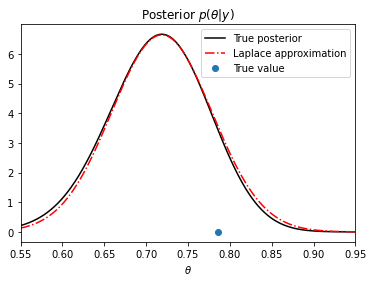

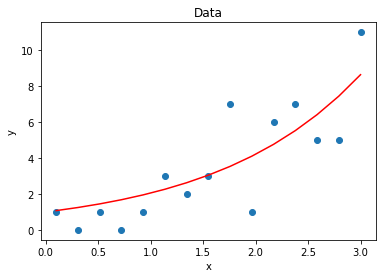

In [12]:
# Template for problem 3(c)
# NOTE: starter code at the begining of the notebook and function 'bayesian_linear_regression' 
#       is required to run this cell

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import norm

# get some data
data = np.loadtxt('/coursedata/ex4_4_data.txt')
x = data[:,0]
y = data[:,1]

theta_true = np.pi / 4 # true parameter used to generate the data
alpha = 1e-2 # prior's parameter

# compute Laplace approximation
theta_lapl = 0.5 # initial
# iterate to optimum with newton's method to find the MAP estimate for theta
for iter in range(100):
    # compute gradient
    # grad = ???
    
    # YOUR CODE HERE
    # raise NotImplementedError()

    # compute Hessian
    # H = ???
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    grad = alpha * theta_lapl - (x @ y - x @ np.exp(theta_lapl * x)) 
    H = alpha + x @ (x * np.exp(theta_lapl * x))
    
    theta_lapl = theta_lapl - grad / H # do newton step

# compute Hessian at optimum
# H = ???
H = np.dot(x, x * np.exp(x * theta_lapl)) + alpha
# YOUR CODE HERE
# raise NotImplementedError()
print(H)
difference = theta_lapl - theta_true

# plot posterior densities
theta = np.linspace(0.55, 0.95, 1000)
post_true = np.zeros(len(theta))
for i in range(len(theta)):
    # log posterior:    
    post_true[i] = (np.dot(y, x * theta[i]) - np.sum(np.exp(x * theta[i]) -
                    np.log(factorial(y))) - 0.5*alpha*np.dot(theta[i], theta[i]))

M = np.amax(post_true)
post_true = np.exp(post_true-M) / np.sum(np.exp(post_true-M)) / (theta[1]-theta[0]) # normalize

# compute approximative density at the points 'theta'
# Hint: you can use norm.pdf from scipy.stats
# post_laplace = ???
post_laplace = norm.pdf(theta,theta_lapl,np.sqrt(1/H))

# YOUR CODE HERE
# raise NotImplementedError()
    
plt.figure(1)
plt.plot(theta, post_true, '-k', label="True posterior")
plt.plot(theta, post_laplace, '-.r', label="Laplace approximation")
plt.plot(theta_true, 0, 'o', label="True value")
plt.xlim(0.55, 0.95)
plt.xlabel('$\\theta$')
plt.title('Posterior $p(\\theta|y)$')
plt.legend()

plt.figure(2)
plt.plot(x, y, 'o', x, np.exp(theta_lapl*x), '-r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()